# Reading Data

In [1]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df = pd.read_excel("/Users/chengjun/github/cjc/data/BigDataDefinition.xlsx", header = None)
df = df.rename(columns={df.columns[0]:'title'})

In [60]:
df['title']

0     Big data refers to the increasingly pervasive ...
1     Big data media’ can be understood as media con...
2     because both the traditional andsocial media a...
3     a cultural, technological, and scholarly pheno...
4     Big Data are heterogeneous collections, create...
5     research that marks a step change in terms of ...
6     Big Data is essentially shorthand for the comb...
7     Big data studies excel at identifying macrosco...
8     To understand big data is to understand how da...
9     "The association in Pasquale’s work is between...
10    large, complex data sets distributed across ne...
11    big data is anything other than hyperbolic mar...
12    Data-driven journalism is not new... Developme...
13    Large amouts of information collected about ma...
14    Actors in different enterprises worked feveris...
15    Digital trace data - hyperlinks, Twitter follo...
16    An analytical measure, along with semantic net...
17    a paradigm emerging from two decades of in

In [61]:
print df['title'][0]

Big data refers to the increasingly pervasive trend of “data-fying”  everyday  life  by  transforming  common  activities  into  streams  of  data


# Bag of words

In [62]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()

In [63]:
bag = count.fit_transform(df['title'])

In [64]:
bag

<20x269 sparse matrix of type '<type 'numpy.int64'>'
	with 408 stored elements in Compressed Sparse Row format>

In [65]:
count.get_feature_names()[:10]

[u'about',
 u'accessible',
 u'across',
 u'activities',
 u'actors',
 u'addition',
 u'advancing',
 u'aggressive',
 u'algorithm',
 u'algorithmic']

In [164]:
print(count.vocabulary_.keys()[:10])

[u'emerging', u'semantic', u'phenomenon', u'relation', u'follow', u'aggressive', u'decisions', u'based', u'knowledge', u'distributed']


In [67]:
pd.DataFrame(bag.toarray(), columns = count.get_feature_names())

,about,accessible,across,activities,actors,addition,advancing,aggressive,algorithm,algorithmic,...,values,varied,visions,was,well,will,with,within,work,worked
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,2,0,1,0


In [142]:
word_freq = [np.sum(i) for i in bag.toarray().T]
words = count.get_feature_names()


In [161]:
df_freq = pd.DataFrame(data = np.array([words, word_freq]).T, columns = ['word', 'freq'])
df_freq['freq'] = pd.to_numeric(df_freq['freq'])
df_freq = df_freq.sort_values(['freq'], ascending =False)
df_freq['rank'] = range(1, len(df_freq)+1)
df_freq[:10]

,word,freq,rank
67,data,26,1
25,and,24,2
164,of,22,3
243,to,14,4
233,the,12,5
44,big,11,6
232,that,9,7
116,in,9,8
31,as,7,9
126,is,7,10


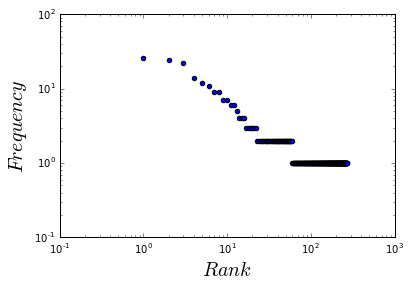

In [162]:
plt.scatter(df_freq['rank'], df_freq['freq'] )
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Frequency$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.show()

## TF-IDF

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(count.fit_transform(df['title'])).toarray())


[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.13  0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


In [69]:
pd.DataFrame(tfidf.fit_transform(count.fit_transform(df['title'])).toarray(),
             columns = count.get_feature_names())

,about,accessible,across,activities,actors,addition,advancing,aggressive,algorithm,algorithmic,...,values,varied,visions,was,well,will,with,within,work,worked
0,0.000000,0.000000,0.000000,0.25692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224237,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.133357,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.270463,0.270463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.230607,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.191331,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.191331,0.000000,0.000000,0.217665,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.128436,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.128436,0.000000,0.112897,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.158762,0.139554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.279108,0.000000,0.158762,0.000000


In [167]:
len(dat[0])

269

In [168]:
dat = tfidf.fit_transform(count.fit_transform(df['title'])).toarray()
tfidf_sum = [np.mean(i) for i in dat.T]
words = count.get_feature_names()
df_word = pd.DataFrame(data = np.array([tfidf_sum, words]).T, columns = ['tfidf', 'word'])
df_word.head()

,tfidf,word
0,0.0149725546693,about
1,0.00666786032087,accessible
2,0.0283357398176,across
3,0.0128459947202,activities
4,0.00702081755622,actors


In [169]:
df_word['tfidf'] = pd.to_numeric(df_word['tfidf'])
df_word = df_word.sort_values(['tfidf'], ascending =False)
df_word['rank'] = range(1, len(df_word)+1)
df_word[:20]

,tfidf,word,rank
67,0.113931,data,1
25,0.107983,and,2
164,0.093457,of,3
243,0.071198,to,4
233,0.069621,the,5
44,0.063716,big,6
132,0.057330,large,7
116,0.055748,in,8
126,0.052753,is,9
232,0.051554,that,10


In [170]:
df_word['tfidf'][0]

0.014972554669299998

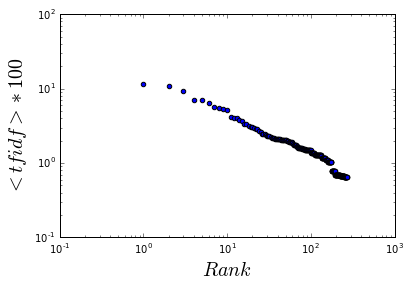

In [179]:
plt.scatter(df_word['rank'], df_word['tfidf']*100 )
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$<tfidf> * 100$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Word Cloud

pip install wordcloud

https://github.com/amueller/word_cloud

In [29]:
from wordcloud import WordCloud


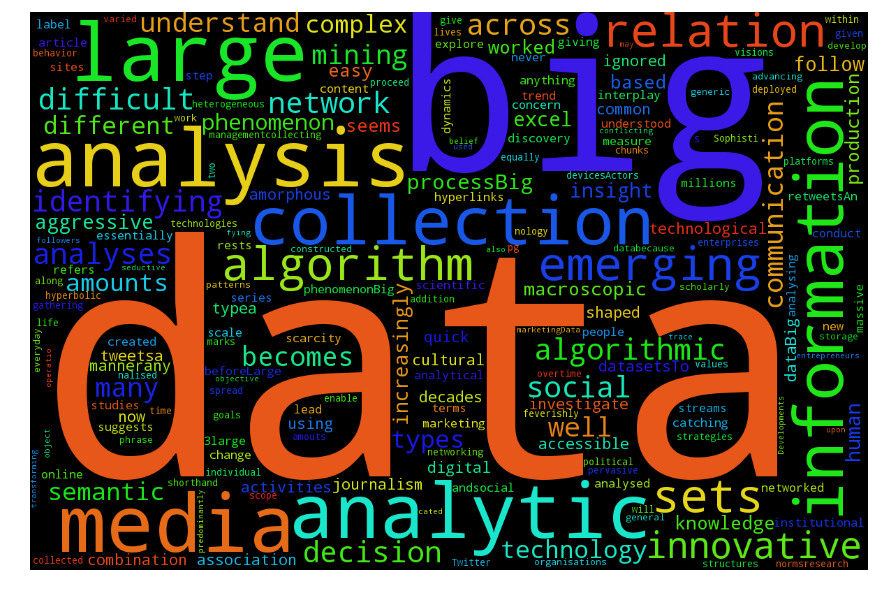

In [82]:
wordcloud = WordCloud(width = 1200, height = 800).generate(''.join(df['title']))
# Open a plot of the generated image.
fig = plt.figure(figsize=(18, 10),facecolor='white')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [184]:
wordcloud

In [187]:
dir(wordcloud)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 'background_color',
 'color_func',
 'fit_words',
 'font_path',
 'font_step',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'height',
 'layout_',
 'margin',
 'mask',
 'max_font_size',
 'max_words',
 'min_font_size',
 'mode',
 'prefer_horizontal',
 'process_text',
 'random_state',
 'ranks_only',
 'recolor',
 'scale',
 'stopwords',
 'to_array',
 'to_file',
 'to_html',
 'to_image',
 'width',
 'words_']

In [195]:
df_wordcloud = pd.DataFrame(wordcloud.words_, columns = ['word', 'value'])
df_wordcloud[:20]

,word,value
0,data,1.000000
1,big,0.260870
2,analysis,0.217391
3,large,0.173913
4,media,0.173913
5,analytic,0.130435
6,information,0.130435
7,collection,0.130435
8,algorithm,0.130435
9,sets,0.130435


In [197]:
df_wordcloud = df_wordcloud.sort_values(['value'], ascending =False)
df_wordcloud['rank'] = range(1, len(df_wordcloud)+1)
df_wordcloud[:20]

,word,value,rank
0,data,1.000000,1
1,big,0.260870,2
2,analysis,0.217391,3
4,media,0.173913,4
3,large,0.173913,5
5,analytic,0.130435,6
6,information,0.130435,7
7,collection,0.130435,8
8,algorithm,0.130435,9
9,sets,0.130435,10


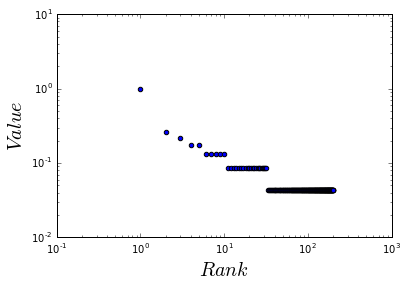

In [198]:
plt.scatter(df_wordcloud['rank'], df_wordcloud['value'] )
plt.xlabel('$Rank$', fontsize = 20)
plt.ylabel('$Value$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [218]:
from PIL import Image
alice_mask = np.array(Image.open("/Users/chengjun/github/cjc/code/img/elephant.jpg"))
wc = WordCloud(background_color="black", max_words=2000, mask=alice_mask)
# generate word cloud
wc.generate(''.join(df['title']))

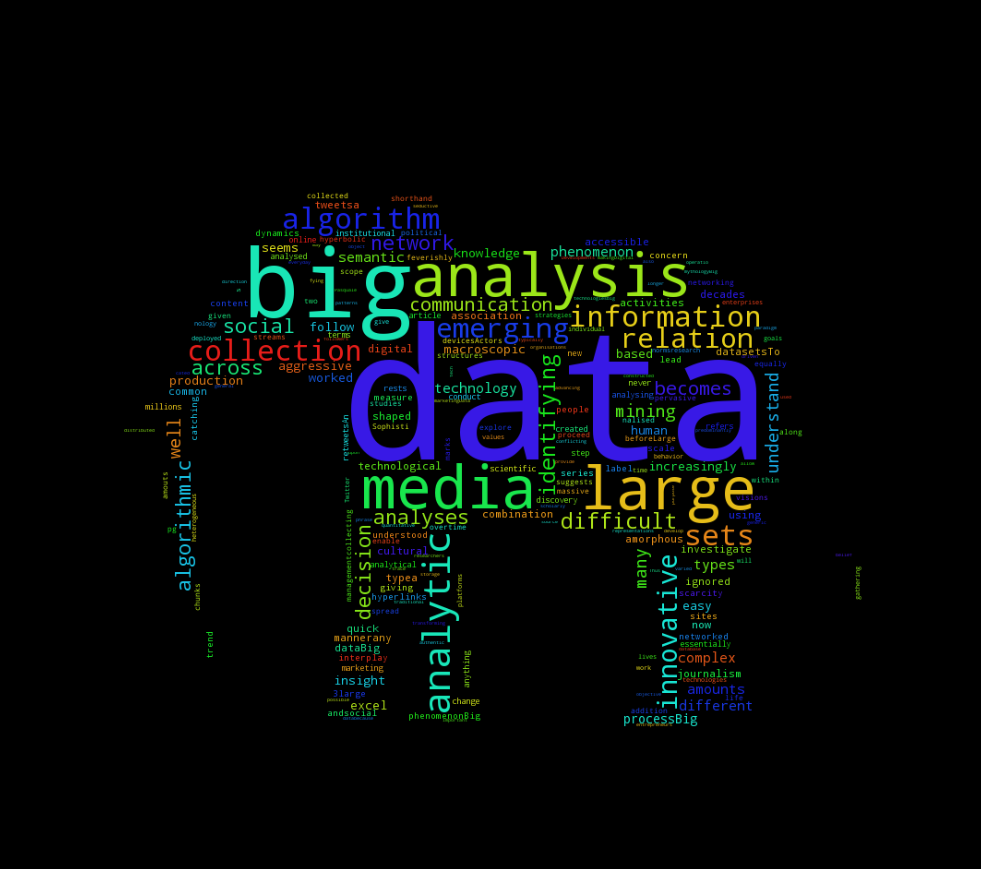

In [222]:
# show
fig = plt.figure(figsize=(20, 15),facecolor='black')

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.figure()
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.axis("off")
plt.show()